In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
adult = pd.read_csv('http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/adult-modified.csv')

In [4]:
adult.head(10)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
5,37,Private,14,Married,White,Female,40,<=50K
6,49,Private,5,Married,Black,Female,16,<=50K
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K


In [9]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
age               10000 non-null object
workclass         10000 non-null object
education         10000 non-null int64
marital-status    10000 non-null object
race              10000 non-null object
sex               10000 non-null object
hours-per-week    10000 non-null int64
income            10000 non-null object
dtypes: int64(2), object(6)
memory usage: 390.7+ KB


In [11]:
adult['age'] = pd.to_numeric(adult['age'])

In [12]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
age               10000 non-null int64
workclass         10000 non-null object
education         10000 non-null int64
marital-status    10000 non-null object
race              10000 non-null object
sex               10000 non-null object
hours-per-week    10000 non-null int64
income            10000 non-null object
dtypes: int64(3), object(5)
memory usage: 429.7+ KB


In [23]:
adult = adult.replace('?', np.NaN)

In [24]:
adult.drop(adult[adult.workclass.isnull()].index, inplace = True)

In [25]:
adult.age.fillna(adult.age.mean(),inplace = True)

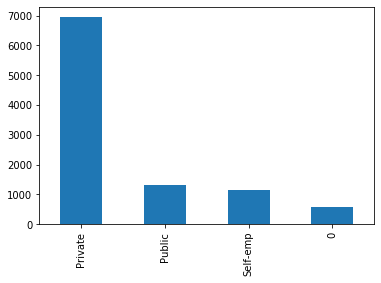

In [31]:
adult['workclass'].value_counts().plot(kind = 'bar')

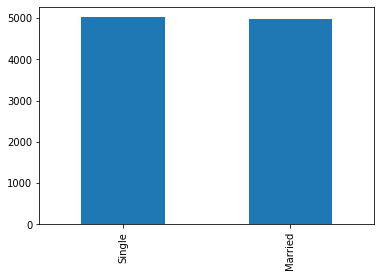

In [33]:
adult['marital-status'].value_counts().plot(kind = 'bar')

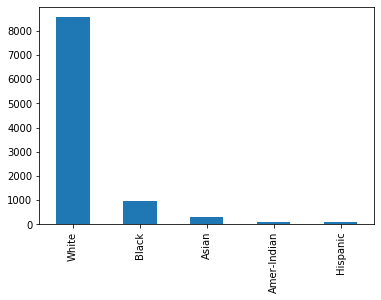

In [34]:
adult['race'].value_counts().plot(kind = 'bar')

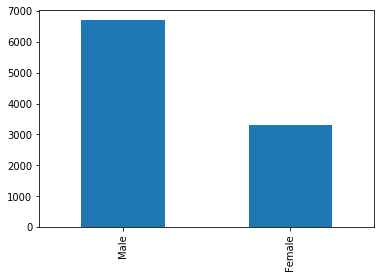

In [35]:
adult['sex'].value_counts().plot(kind = 'bar')

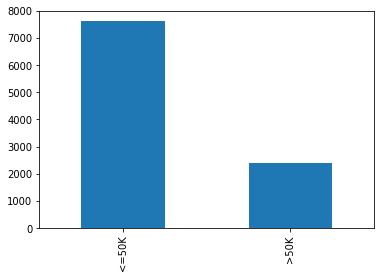

In [36]:
adult['income'].value_counts().plot(kind = 'bar')

(array([ 198.,  102., 2103., 2349., 2158., 1651.,  910.,  381.,  117.,
          31.]),
 array([ 0.,  9., 18., 27., 36., 45., 54., 63., 72., 81., 90.]),
 <a list of 10 Patch objects>)

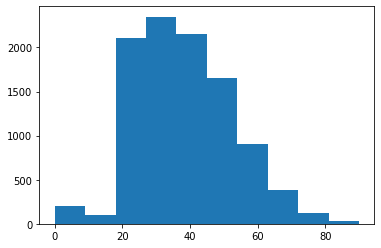

In [37]:
plt.hist(adult['age'])

(array([  65.,   88.,  358.,  295.,  472., 3232., 2721.,  318., 2161.,
         290.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

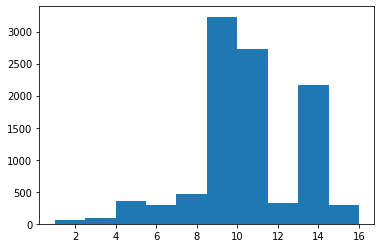

In [38]:
plt.hist(adult['education'])

(array([ 234.,  641.,  725., 5417.,  962., 1202.,  577.,  139.,   70.,
          33.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <a list of 10 Patch objects>)

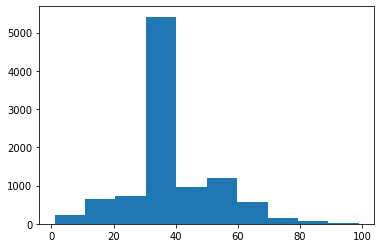

In [39]:
plt.hist(adult['hours-per-week'])

In [47]:
cross1 = pd.crosstab(adult['education'], adult['race'])

In [48]:
cross1

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,15
2,0,1,4,3,41
3,0,4,6,3,75
4,5,5,17,6,172
5,0,3,23,2,125
6,9,4,31,4,247
7,4,7,52,5,295
8,0,3,19,3,84
9,35,71,377,25,2724


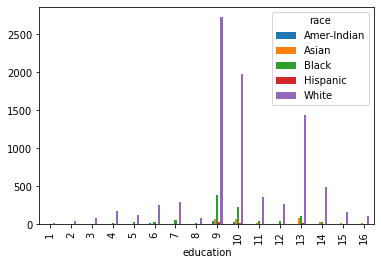

In [46]:
cross1.plot(kind = 'bar')

In [49]:
cross2 = pd.crosstab(adult['workclass'], adult['income'])

In [51]:
cross2

income,<=50K,>50K
workclass,,
0,528,60
Private,5443,1504
Public,925,392
Self-emp,725,423


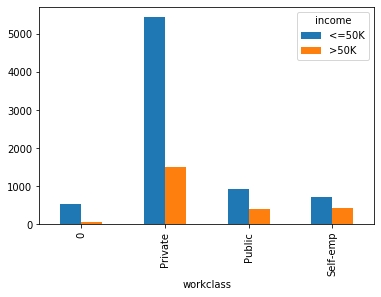

In [50]:
cross2.plot(kind = 'bar')

In [52]:
cross3 = pd.crosstab(adult['workclass'], adult['race'])

In [53]:
cross3

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
0,7,18,61,8,494
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


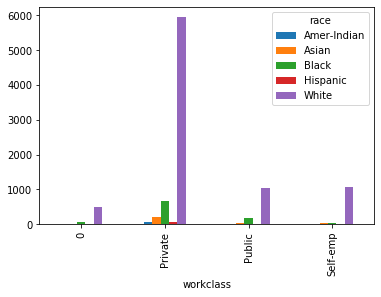

In [54]:
cross3.plot(kind = 'bar')

In [55]:
cross4 = pd.crosstab(adult['race'], adult['income'])

In [56]:
cross4

income,<=50K,>50K
race,,
Amer-Indian,89,10
Asian,241,68
Black,832,121
Hispanic,77,6
White,6382,2174


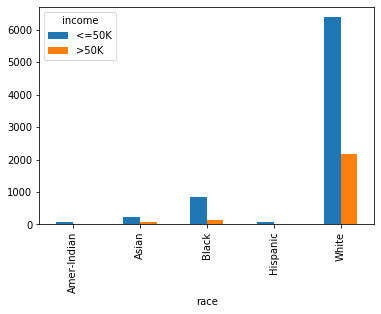

In [57]:
cross4.plot(kind = 'bar')

In [58]:
cross4['low income'] = cross4['<=50K']/ (cross4['<=50K'] + cross4['>50K'])

In [59]:
cross4

income,<=50K,>50K,low income
race,,,
Amer-Indian,89,10,0.898990
Asian,241,68,0.779935
Black,832,121,0.873033
Hispanic,77,6,0.927711
White,6382,2174,0.745909


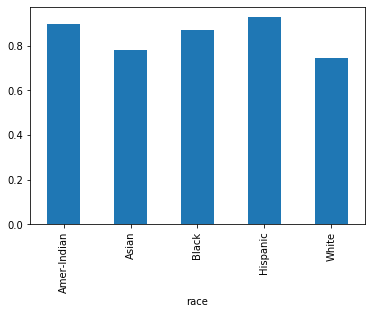

In [60]:
cross4['low income'].plot(kind='bar')

In [61]:
cross4['high income'] = cross4['>50K']/ (cross4['<=50K'] + cross4['>50K'])

In [62]:
cross4

income,<=50K,>50K,low income,high income
race,,,,
Amer-Indian,89,10,0.898990,0.101010
Asian,241,68,0.779935,0.220065
Black,832,121,0.873033,0.126967
Hispanic,77,6,0.927711,0.072289
White,6382,2174,0.745909,0.254091


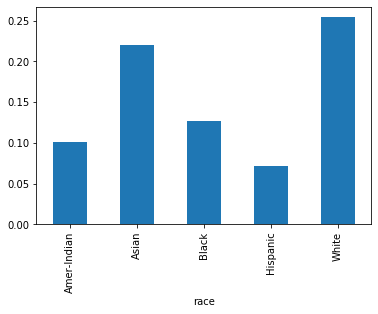

In [63]:
cross4['high income'].plot(kind = 'bar')

In [64]:
cross4.describe()

income,<=50K,>50K,low income,high income
count,5.000000,5.000000,5.000000,5.000000
mean,1524.200000,475.800000,0.845116,0.154884
std,2733.045499,950.493135,0.078413,0.078413
min,77.000000,6.000000,0.745909,0.072289
25%,89.000000,10.000000,0.779935,0.101010
50%,241.000000,68.000000,0.873033,0.126967
75%,832.000000,121.000000,0.898990,0.220065
max,6382.000000,2174.000000,0.927711,0.254091


In [65]:
adult = pd.get_dummies(adult)

In [66]:
adult.head(5)

,age,education,hours-per-week,workclass_0,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [67]:
adult = adult.drop('income_<=50K', axis =1)

In [69]:
adult.head(5)

,age,education,hours-per-week,workclass_0,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_>50K
0,39,13,40,0,0,1,0,0,1,0,0,0,0,1,0,1,0
1,50,13,13,0,0,0,1,1,0,0,0,0,0,1,0,1,0
2,38,9,40,0,1,0,0,0,1,0,0,0,0,1,0,1,0
3,53,7,40,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,28,13,40,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [70]:
target = adult['income_>50K']

In [72]:
target.head(5)

0    0
1    0
2    0
3    0
4    0
Name: income_>50K, dtype: uint8

In [73]:
train, test, train_target, test_target = train_test_split(adult, target, test_size=0.2, random_state = 12) 

Naive-Bayes using Gaussian

In [76]:
from sklearn import naive_bayes
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train, train_target)
nbpreds_test = nbclf.predict(test)
print(nbpreds_test)

[1 1 0 ... 0 0 0]


In [77]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldclf = LinearDiscriminantAnalysis()
ldclf = ldclf.fit(train, train_target)
ldpreds_test = ldclf.predict(test)
print(ldpreds_test)

[0 0 0 ... 0 0 0]


C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [80]:
from sklearn import tree
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
treeclf = treeclf.fit(train, train_target)
treepreds_test = treeclf.predict(test)

In [86]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(nbclf, adult, target, cv=10)
print(cv_scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [87]:
print((cv_scores.mean(), cv_scores.std() * 2))

(1.0, 0.0)


In [88]:
cv_scores = cross_val_score(ldclf, adult, target, cv=10)
print(cv_scores)

C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\v

[0.81918082 0.813      0.8        0.829      0.815      0.798
 0.804      0.816      0.834      0.81881882]


C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\vallabh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [89]:
print((cv_scores.mean(), cv_scores.std() * 2))

(0.8146999637999638, 0.022164497819534213)


In [90]:
cv_scores = cross_val_score(treeclf, adult, target, cv=10)
print(cv_scores)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [91]:
print((cv_scores.mean(), cv_scores.std() * 2))

(1.0, 0.0)


Accuracy for tree and naive-bayes is more

In [93]:
from sklearn.tree import export_graphviz

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

tree = export_graphviz(treeclf, out_file=None, feature_names=train.columns, class_names=['No','Yes'])
graph = Source(tree)

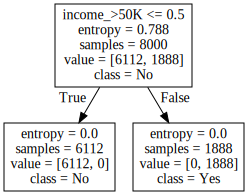

In [94]:
display(SVG(graph.pipe(format='svg')))